<div style="background-color: #e6f7ff; padding: 15px; border: 2px solid #99ccff; border-radius: 10px;">
    <h2 style="color: #003366; font-family: Verdana, sans-serif;">
        Customer Segmentation: Clustering
    </h2>
    <p style="color: #005580; font-size: 18px; font-family: Verdana, sans-serif;">
        Customer segmentation is a key marketing technique that allows businesses to identify and target specific groups of customers. This project uses K-means clustering to segment customers based on their income, recency of purchases, spending on various products, and purchase behavior.
    </p>
</div>


In [2]:
import pandas as pd

# Load the dataset
file_path = "marketing_campaign.csv"
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows and summary information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  04-09-2012       58       635  ...                  7             0   
 1  08-03-2014       38        11  ...                  5             0   
 2  21-08-2013       26       426  ...                  4             0   
 3  10-02-2014       26        11  ...                  6             0   
 4  19-01-2014       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


## The dataset is now correctly parsed, with the following columns:
        


1. ID: Unique identifier for each customer.
2. Year_Birth: Year of birth of the customer.
3. Education: Education level of the customer.
4. Marital_Status: Marital status of the customer.
5. Income: Annual income of the customer.y
6. Kidhome: Number of children at home.
7. Teenhome: Number of teenagers at home.
8. Dt_Customer: Date of customer's enrollment with the company.
9. Recency: Number of days since the last purchase.
10. MntWines: Amount spent on wine in the last 2 years.
11. MntFruits: Amount spent on fruits in the last 2 years.
12. MntMeatProducts: Amount spent on meat in the last 2 years.
13. MntFishProducts: Amount spent on fish in the last 2 years.
14. MntSweetProducts: Amount spent on sweets in the last 2 years.
15. MntGoldProds: Amount spent on gold products in the last 2 years.
16. NumDealsPurchases: Number of purchases made with a discount.
17. NumWebPurchases: Number of purchases made through the company's website.
18. NumCatalogPurchases: Number of purchases made using a catalog.
19. NumStorePurchases: Number of purchases made directly in stores.
20. NumWebVisitsMonth: Number of visits to the company's website in the last month.
21. AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
22. AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
23. AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
24. AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
25. AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
26. Complain: 1 if the customer complained in the last 2 years, 0 otherwise.
27. Z_CostContact: Cost per contact (constant).
28. Z_Revenue: Revenue from each customer (constant).
29. Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise.

## Exploring the Data
Let's start with some basic exploration to understand the structure and summary statistics of the data.

1. Summary Statistics
2. Missing Values
3. Distribution of Key Features

Let's perform these steps.
 

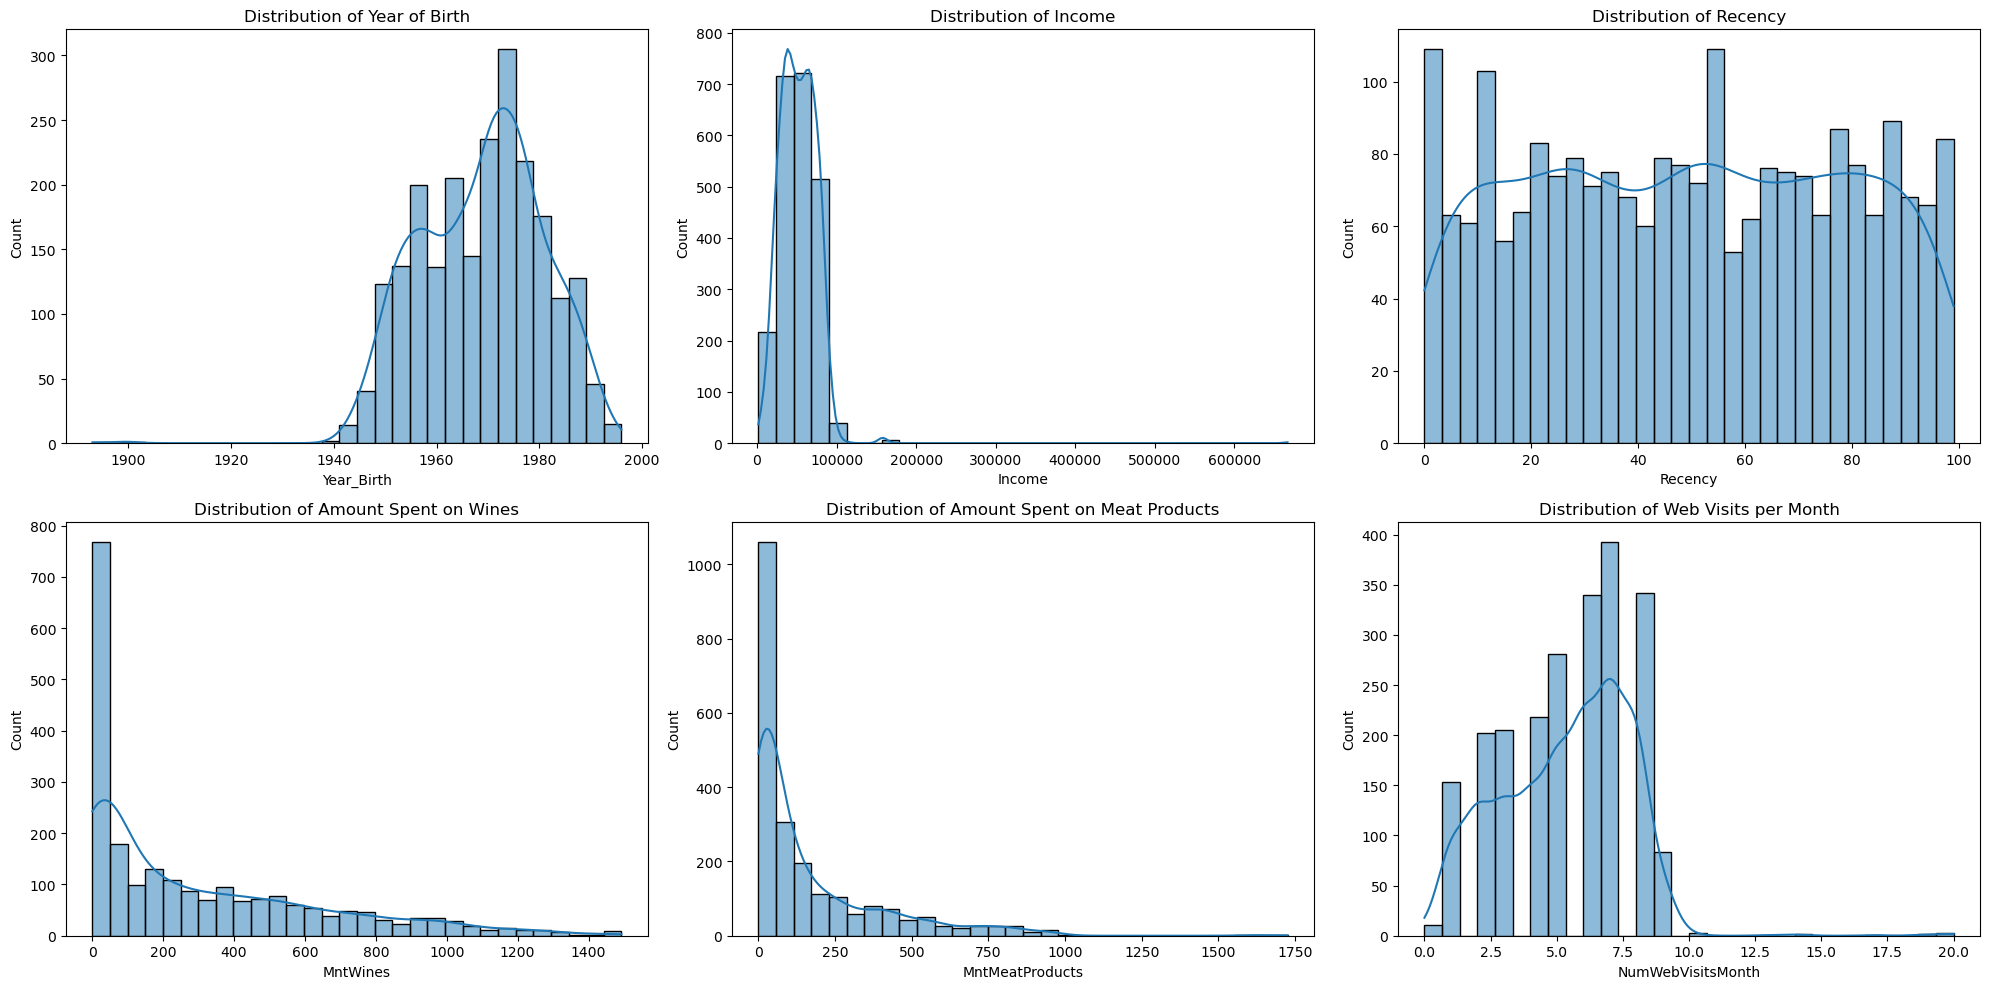

In [2]:
# Summary statistics of the dataset
summary_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Visualizing the distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot distribution of Age
plt.subplot(2, 3, 1)
sns.histplot(data['Year_Birth'], kde=True, bins=30)
plt.title('Distribution of Year of Birth')

# Plot distribution of Income
plt.subplot(2, 3, 2)
sns.histplot(data['Income'].dropna(), kde=True, bins=30)
plt.title('Distribution of Income')

# Plot distribution of Recency
plt.subplot(2, 3, 3)
sns.histplot(data['Recency'], kde=True, bins=30)
plt.title('Distribution of Recency')

# Plot distribution of MntWines
plt.subplot(2, 3, 4)
sns.histplot(data['MntWines'], kde=True, bins=30)
plt.title('Distribution of Amount Spent on Wines')

# Plot distribution of MntMeatProducts
plt.subplot(2, 3, 5)
sns.histplot(data['MntMeatProducts'], kde=True, bins=30)
plt.title('Distribution of Amount Spent on Meat Products')

# Plot distribution of NumWebVisitsMonth
plt.subplot(2, 3, 6)
sns.histplot(data['NumWebVisitsMonth'], kde=True, bins=30)
plt.title('Distribution of Web Visits per Month')

plt.tight_layout()
plt.show()



## Data Exploration Results
        
### Summary Statistics
I have displayed the summary statistics of the dataset for your review. This includes measures such as the mean, standard deviation, minimum, and maximum values for each numerical feature.

### Missing Values
The dataset contains 24 missing values in the Income column. All other columns have complete data.

### Distributions of Key Features
1. Year of Birth: The distribution shows a concentration of customers born between 1950 and 1980.
2. Income: The income distribution is right-skewed, with most customers earning between 20,000 and 80,000.
3. Recency: The recency of purchases shows a fairly even distribution across different values.
4. Amount Spent on Wines: Most customers have spent less than 500 on wines in the last two years, with a long tail of higher spenders.
5. Amount Spent on Meat Products: Similar to wines, most customers have spent less than 500 on meat products, with a few high spenders.
6. Web Visits per Month: Most customers visit the website between 0 and 10 times per month.


## Next Steps: Customer Segmentation Analysis
We'll proceed with customer segmentation using clustering algorithms. Here are the steps we will follow:

1. Data Preprocessing: Handle missing values and normalize the data.
2. Feature Selection: Choose relevant features for segmentation.
3. Clustering with K-Means: Perform K-Means clustering.
4. Cluster Analysis: Analyze the characteristics of each cluster.
5. Visualization: Visualize the clusters and their features.
6. Business Insights: Discuss the business insights derived from the segmentation.
Let's start with data preprocessing and feature selection.
       


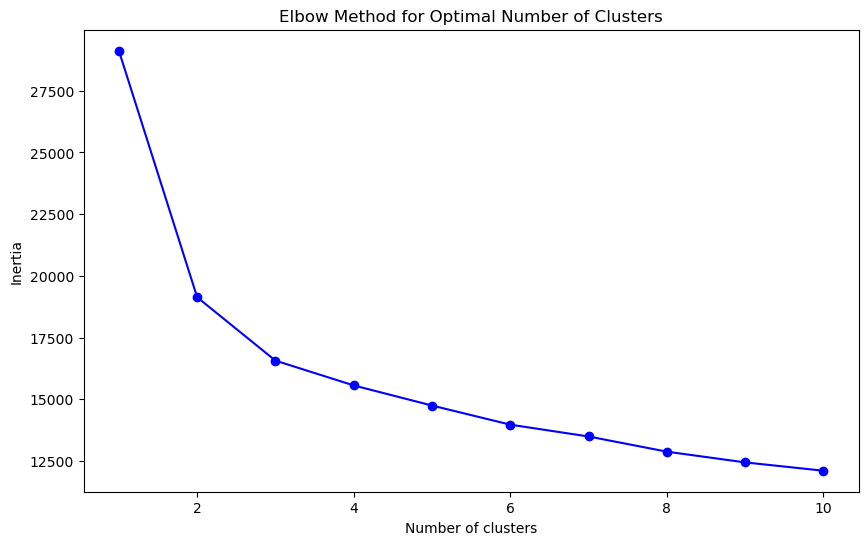

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data['Income'] = imputer.fit_transform(data[['Income']])

# Selecting features for segmentation
features = data[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
from sklearn.cluster import KMeans

# Determine the number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow plot, choose an appropriate number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyzing the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()




## Analyzing the Clusters
        
         
        
Based on the K-Means clustering results, we have segmented the customers into four clusters. Here are the key characteristics of each cluster:

### 1. Cluster 0:

High average income.
Low recency, indicating recent purchases.
High spending on wines, meat products, and gold products.
Frequent web and store purchases.
Moderate web visits per month.

### 2. Cluster 1:

Moderate income.
High recency, indicating less recent purchases.
Moderate spending across all product categories.
Lower number of purchases overall.
Fewer web visits per month.

### 3. Cluster 2:

Low average income.
Moderate recency.
Low spending across all product categories.
Lower number of purchases.
Few web visits per month.

### 4. Cluster 3:

Moderate to high income.
Low recency, indicating recent purchases.
High spending on wines and meat products.
Frequent catalog and store purchases.
High number of web visits per month.

## Visualizing the Clusters
We'll create visualizations to better understand the distribution of key features across different clusters.

### Visualization of Income and Spending
Let's plot the distribution of income and the amount spent on wines for each cluster.

### Visualization of Purchase Behavior
We'll also visualize the number of web purchases and store purchases for each cluster.

Let's create these visualizations.

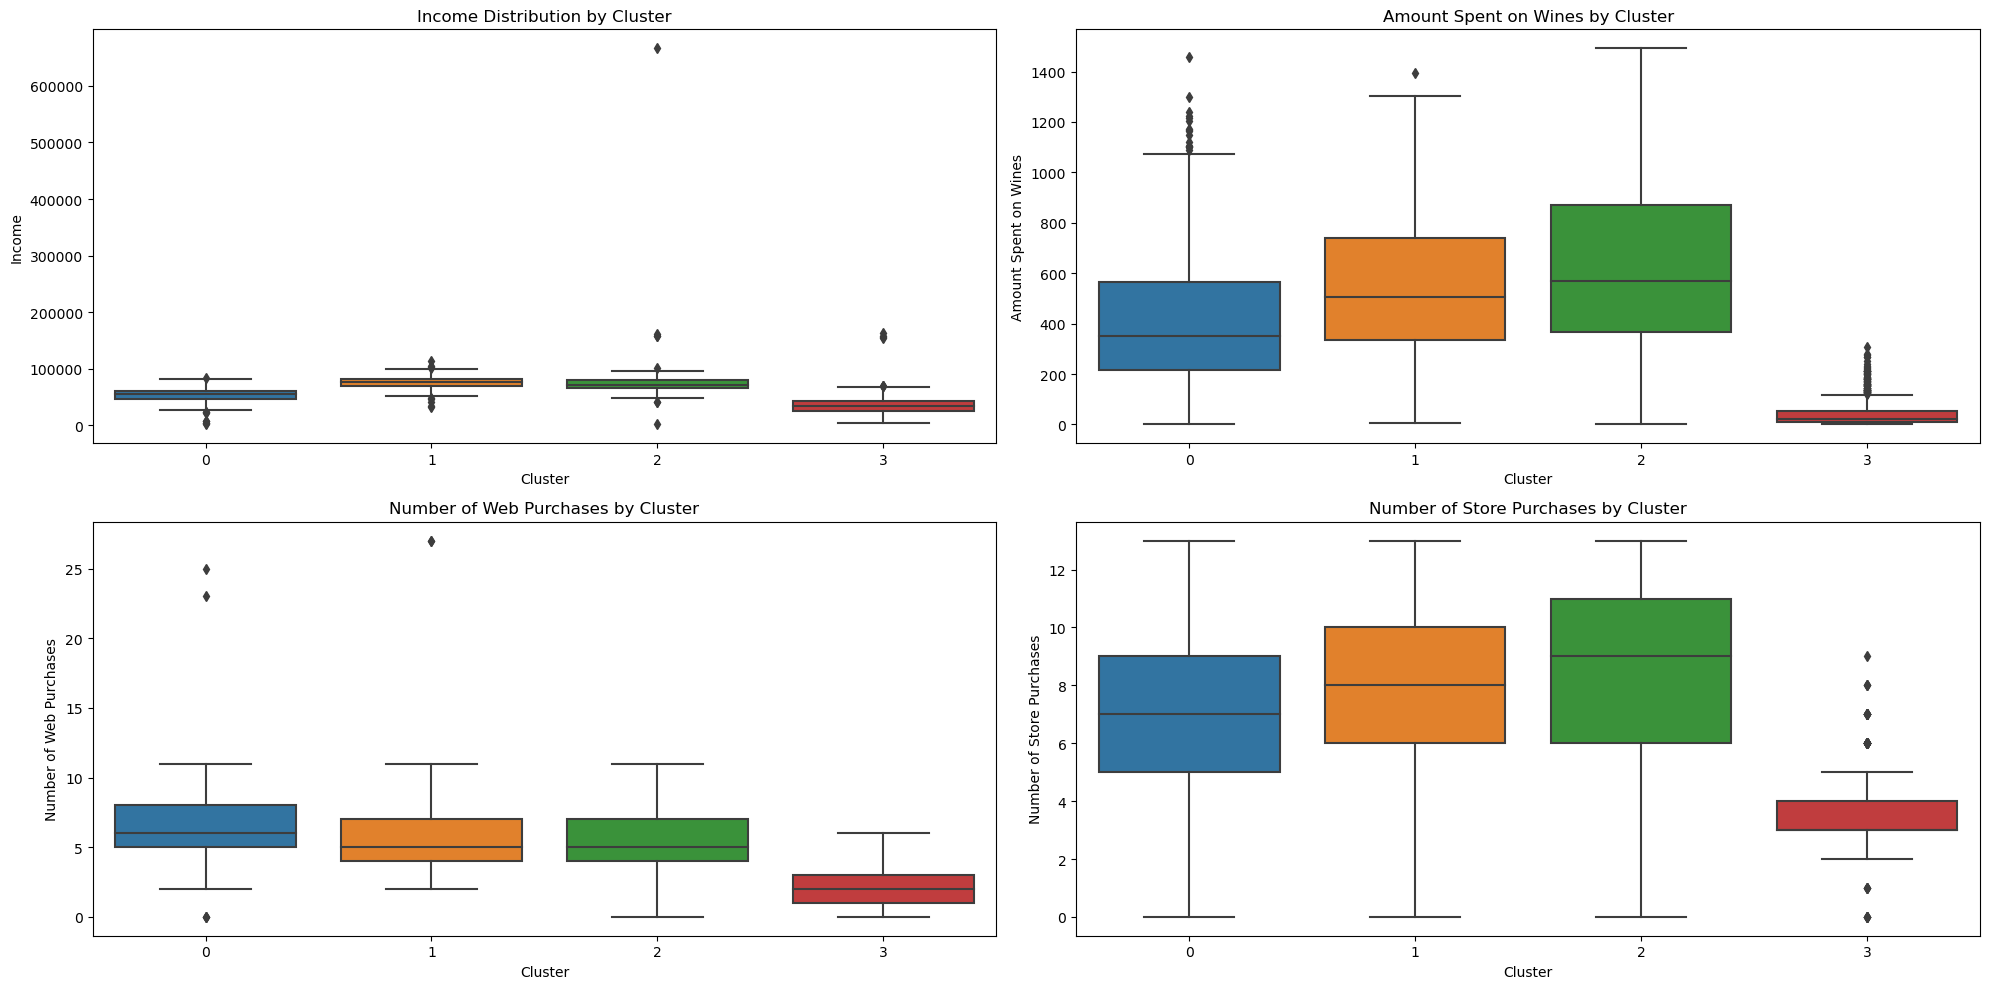

In [4]:
# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plotting income distribution by cluster
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Cluster'], y=data['Income'])
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

# Plotting amount spent on wines by cluster
plt.subplot(2, 2, 2)
sns.boxplot(x=data['Cluster'], y=data['MntWines'])
plt.title('Amount Spent on Wines by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Wines')

# Plotting number of web purchases by cluster
plt.subplot(2, 2, 3)
sns.boxplot(x=data['Cluster'], y=data['NumWebPurchases'])
plt.title('Number of Web Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Purchases')

# Plotting number of store purchases by cluster
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Cluster'], y=data['NumStorePurchases'])
plt.title('Number of Store Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Store Purchases')

plt.tight_layout()
plt.show()




## Business Insights from Customer Segmentation
Based on the clustering analysis and visualizations, here are the key business insights for each cluster:

### Cluster 0: High Income, Recent Purchasers
Characteristics: High income, recent purchases, high spending on luxury items like wines and gold products, frequent online and in-store purchases.
Marketing Strategy: Focus on premium products and personalized offers. Loyalty programs and exclusive promotions would likely appeal to this segment. They respond well to online and store campaigns.

### Cluster 1: Moderate Income, Less Recent Purchasers
Characteristics: Moderate income, less recent purchases, moderate spending across all categories, fewer purchases overall.
Marketing Strategy: Re-engagement campaigns could be effective. Offer discounts and incentives to encourage purchases. Highlight new arrivals and seasonal promotions to attract their interest.

### Cluster 2: Low Income, Infrequent Purchasers
Characteristics: Low income, moderate recency, low spending across all categories, few purchases.
Marketing Strategy: Budget-friendly options and value-based promotions will resonate with this group. Emphasize affordability and essential items. Consider bundling products to increase purchase volume.

### Cluster 3: Moderate to High Income, Frequent Purchasers
Characteristics: Moderate to high income, recent purchases, high spending on wines and meat products, frequent catalog and store purchases, high web visits.
Marketing Strategy: Target with both online and offline promotions. Catalog campaigns can be very effective. Highlighting gourmet and premium food products will appeal to their spending habits. Cross-channel marketing strategies will maximize reach.